In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader as data
import datetime


In [4]:

import yfinance as yf


# Define start and end dates
start = '2015-01-01'
end = '2023-12-31'

try:
    # Fetch data using yfinance
    df = yf.download('AAPL', start=start, end=end)
    print(df.head())
except Exception as e:
    print(f"Error fetching data: {e}")



[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.402168  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  23.714725  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  23.716961  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.049515  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  24.973558  237458000


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402168,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714725,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716961,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049515,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973558,237458000


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


In [7]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402168,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714725,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716961,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049515,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973558,237458000


In [8]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


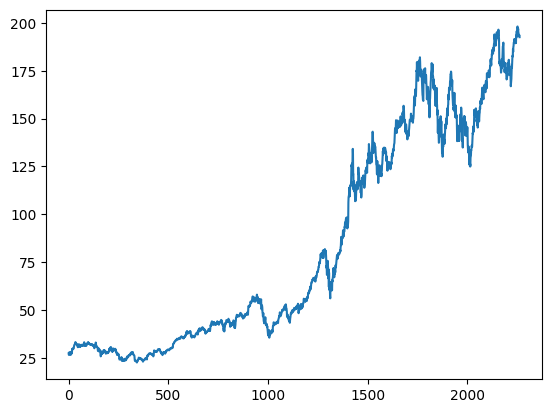

In [9]:
plt.plot(df['Close'])

In [10]:
moving_avg100=df.Close.rolling(100).mean()
moving_avg100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2259    181.768301
2260    181.787101
2261    181.898701
2262    182.046001
2263    182.173301
Name: Close, Length: 2264, dtype: float64

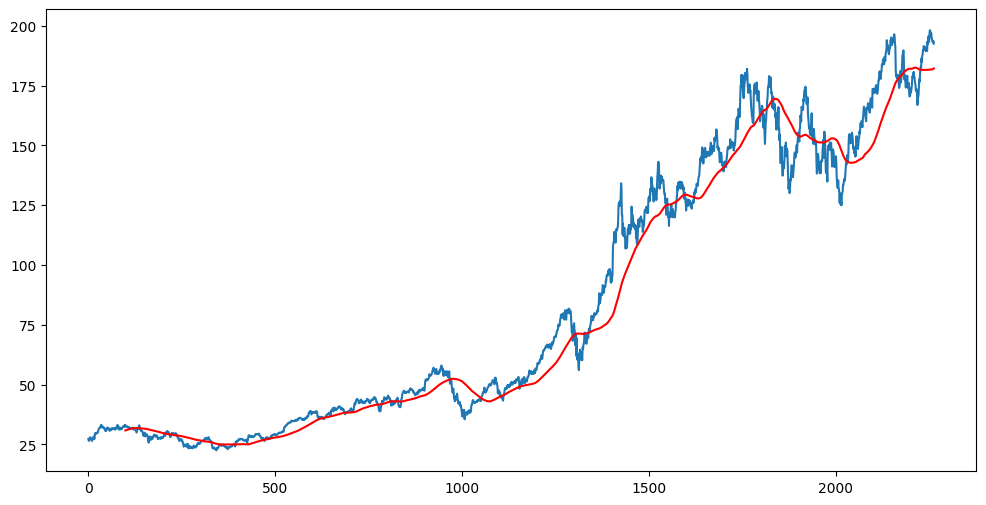

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(moving_avg100,'r')

In [12]:
moving_avg200=df.Close.rolling(200).mean()
moving_avg200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2259    178.649100
2260    178.871851
2261    179.085250
2262    179.290201
2263    179.487900
Name: Close, Length: 2264, dtype: float64

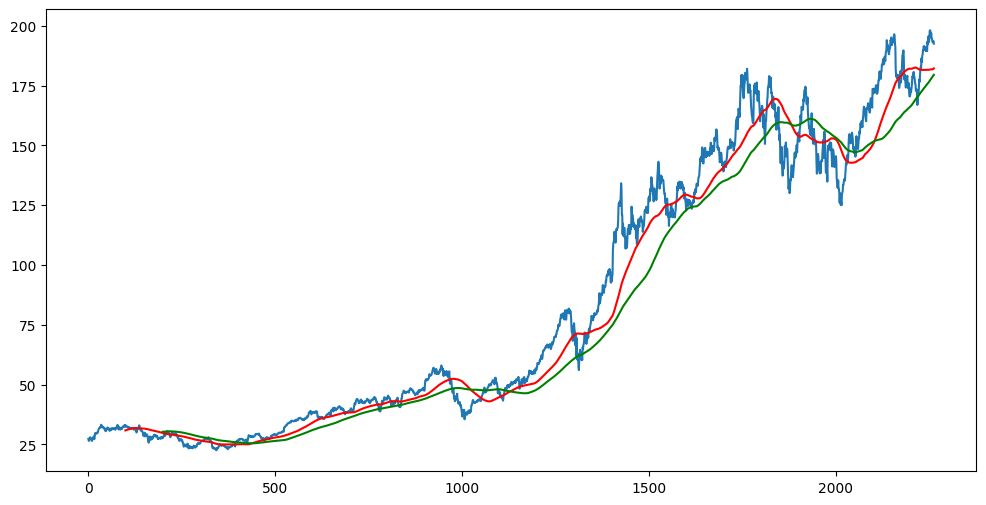

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(moving_avg100,'r')
plt.plot(moving_avg200,'g')

In [14]:
df.shape

(2264, 5)

##**Build Machine Learning model**

**Machine Learning Libraries:**

In [16]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [17]:
#Splitting the Dataset
train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(train.shape)
print(test.shape)

(1584, 1)
(680, 1)


In [18]:
train.head()

,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500


In [19]:
test.head()

,Close
1584,133.110001
1585,133.500000
1586,131.940002
1587,134.320007
1588,134.720001


In [20]:
scaler=MinMaxScaler(feature_range=(0,1))

In [21]:
train_array=scaler.fit_transform(train)

train_array






array([[0.03937384],
       [0.03298777],
       [0.03300851],
       ...,
       [0.92817746],
       [0.92535766],
       [0.93099725]])

In [22]:
train_array.shape

(1584, 1)

In [23]:
x_train=[]   #This list will store sequences of data, which serve as input features for the model.
y_train=[]   #This list will store the corresponding target values (labels) that the model should predict.

for i in range(100,train_array.shape[0]):
  x_train.append(train_array[i-100:i])
  y_train.append(train_array[i,0])


In [24]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [25]:
x_train.shape #(num_samples, timesteps, features)

(1484, 100, 1)

In [26]:
x_train.shape[1]

100

In [27]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model=Sequential()
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model=Sequential()
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model=Sequential()
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [29]:
# Optionally build the model
model.build(input_shape=(None, x_train.shape[1], 1))

# Optionally run a dummy input to set the model's input shape
sample_input = np.zeros((1, x_train.shape[1], 1))
model(sample_input)

# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 120)            │        58,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,681 (229.22 KB)

 Trainable params: 58,681 (229.22 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0714
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - loss: 0.0059
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - loss: 0.0051
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - loss: 0.0041
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - loss: 0.0045
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - loss: 0.0037
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - loss: 0.0030
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - loss: 0.0032
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 0.0035
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - loss: 0.0032
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0036
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0029
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0033
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0031
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss

In [31]:
model.save('keras_model.h5')

In [32]:
test.head()

,Close
1584,133.110001
1585,133.500000
1586,131.940002
1587,134.320007
1588,134.720001


In [33]:
train.tail()

,Close
1579,134.429993
1580,132.029999
1581,134.500000
1582,134.160004
1583,134.839996


In [34]:
last_100_days=train.tail(100)

In [35]:
final_df = pd.concat([last_100_days, test], ignore_index=True)

In [36]:
final_df.head()

,Close
0,113.849998
1,115.169998
2,116.029999
3,116.589996
4,119.050003


In [37]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01566579],
       [0.0258723 ],
       [0.03251837],
       [0.0617138 ],
       [0.10526943],
       [0.10954193],
       [0.10788041],
       [0.09969145],
       [0.11749349],
       [0.12497031],
       [0.09411346],
       [0.11144077],
       [0.10159037],
       [0.09411346],
       [0.16650841],
       [0.16567765],
       [0.17624019],
       [0.15202949],
       [0.1706622 ],
       [0.21398061],
       [0.20306204],
       [0.21504869],
       [0.27106579],
       [0.24946589],
       [0.23581773],
       [0.22359368],
       [0.18466657],
       [0.2036553 ],
       [0.15131735],
       [0.20258722],
       [0.21599815],
       [0.17956322],
       [0.17742706],
       [0.20223119],
       [0.17873255],
       [0.15772609],
       [0.16591506],
       [0.21576074],
       [0.27320195],
       [0.29931175],
       [0.34500355],
       [0.34785194],
       [0.33479704],
       [0.27581293],
       [0.21493007],
       [0.24080228],
       [0.250

In [38]:
input_data.shape

(780, 1)

In [41]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [42]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(680, 100, 1)
(680,)


In [43]:
y_pred=model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [44]:
y_pred.shape

(680, 1)

In [45]:
y_test

array([0.22857823, 0.23320675, 0.21469266, 0.24293862, 0.24768576,
       0.24376929, 0.23415622, 0.23296934, 0.20899606, 0.22181337,
       0.16615238, 0.16911948, 0.18858304, 0.19416102, 0.15428435,
       0.14312847, 0.10586278, 0.1319725 , 0.16140515, 0.14740088,
       0.1305483 , 0.12864946, 0.15974364, 0.13743178, 0.15725136,
       0.15487779, 0.15428435, 0.13565155, 0.1277    , 0.12378353,
       0.13304057, 0.11500121, 0.14289106, 0.14300976, 0.15297886,
       0.15760739, 0.14550204, 0.16021837, 0.19736526, 0.18739616,
       0.19344879, 0.21291235, 0.19712803, 0.21896516, 0.23890336,
       0.23558032, 0.23213867, 0.22857823, 0.24839781, 0.26679329,
       0.27427021, 0.27794927, 0.30987429, 0.3343224 , 0.3645859 ,
       0.3488014 , 0.37099456, 0.36375505, 0.3772846 , 0.41894131,
       0.41098975, 0.38618562, 0.33942556, 0.38333723, 0.3744362 ,
       0.39105155, 0.41193921, 0.41704256, 0.39069553, 0.36945166,
       0.3772846 , 0.37989558, 0.37586049, 0.39769762, 0.39283

In [46]:
scaler.scale_

array([0.01186803])

In [47]:
scale_data=1/0.01186803
y_pred = y_pred * scale_data
y_test = y_test * scale_data

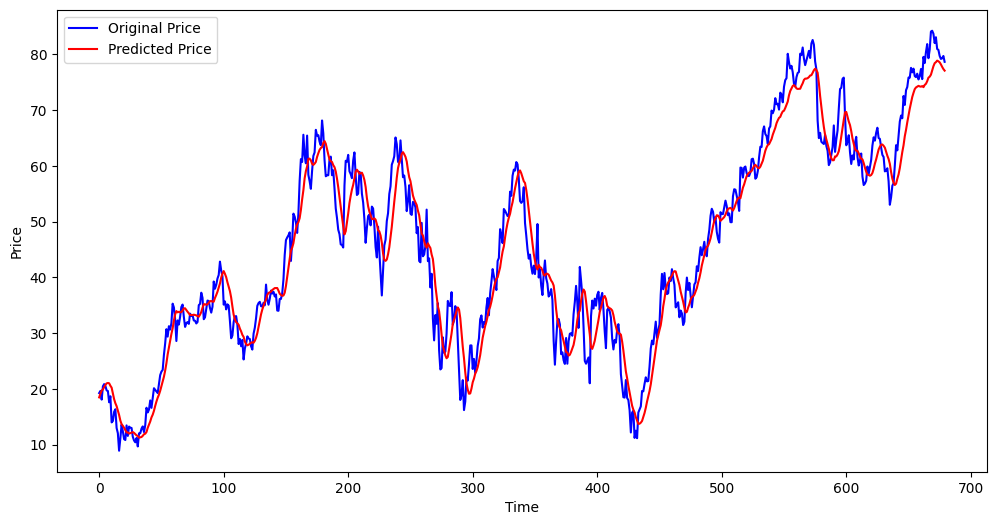

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()